In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv', header=None)
df = np.array(df)
X = df[:,1:]
y = df[:,0]

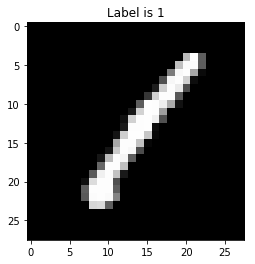

In [3]:
data = df[:,:]  
label = data[0,0] # The first column is the label
pixels = data[0,1:] # The rest of columns are pixels

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixels , cmap='gray')
plt.show()


In [4]:
def activation(a,func='sigmoid',grad = False):
    if func == 'sigmoid':
        sigm = 1/(1.0 + np.exp(-a) )
        if grad == True:
            return np.multiply(sigm,1-sigm)
        else :
            return sigm
    if func == 'RelU':
        RelU = np.multiply(a>0,a)
        if grad == True:
            return np.double(a>0)
        else:
            return RelU
    if func == "tanh":
        tanh = np.tanh(a)# np.divide(np.exp(a)- np.exp(-a),np.exp(a) + np.exp(-a)) 
        if grad == True:
            return (1 -np.power(tanh,2))
        else:
            return tanh
    if func == 'Softmax':
        n,m = np.shape(a)
        f = np.exp(a)
        return np.divide(f,f.sum(axis=0)).reshape(n,m)#.reshape(1,m))

In [7]:
# Checking Helper funcion
a = np.array([[1.0,2,3],[3,5,6]])
print(activation(a,func='Softmax',grad = False))


[[0.11920292 0.04742587 0.04742587]
 [0.88079708 0.95257413 0.95257413]]


In [8]:
def forwardprop(X,W,b,actfun = "sigmoid"):
    W0 = W[0]
    W1 = W[1]
    b0 = b[0]
    b1 = b[1]
    h1 = np.dot(W0,X) + b0
    a1 = activation(h1,func = actfun)
    h2 = np.dot(W1,a1) + b1
    a2 = activation(h2,'Softmax')
    return (a1,a2,h1,h2)


In [9]:
# Segregating data into input and output, and obtaining important parameters

m,n = X.shape 
X = (df[:,1:].T)/256.0

y = df[:,0].astype(int)
Y = np.zeros(shape = (10,n))
Y[y,range(n)] = 1


In [10]:
def train(Y,X,epoch=100,h=10,alpha=1,batch = 100):
    # alpha - Learning rate
    # h - Number of neuron is hidden layer
    # epochs - no of iterations
    m,n = X.shape
    o,_ = Y.shape
    np.random.seed(0)
    # Weight initialization
    W0 = -1/m**0.5 + 2*np.random.rand(h,m)/m**0.5
    b0 = np.zeros(shape = (h,1) )
    W1 = -1/h**0.5 + 2*np.random.rand(o,h)/h**0.5
    b1 = np.zeros(shape = (o,1))
    
    iter = 0
    while (iter<epoch):
        
        #start_time = time.clock()
        for i in range(batch):
            
            step = np.floor(n/float(batch)).astype(int)# - 30
            s = -(i)*step + step*(i+1)
            
            x = X[:,(i)*step:step*(i+1)].reshape(m,s)
            y = Y[:,(i)*step:step*(i+1)].reshape(o,s)
            a1,a2,h1,h2 = forwardprop(x,[W0,W1],[b0,b1],actfun='sigmoid')
            #print a2.shape,h2.shape,h1.shape,W1.shape,W0.shape
            dh2 = (a2-y)
            da1 = np.dot(W1.T,dh2)
            dh1 = np.multiply(da1,activation(h1,func='sigmoid',grad = True))
            dW1 = np.dot(dh2,a1.T)/s
            dW0 = np.dot(dh1,x.T)/s
            db1 = np.dot(dh2,np.ones(shape = (s,1)))/s
            db0 = np.dot(dh1,np.ones(shape = (s,1)))/s
            W0 += -alpha*dW0
            W1 += -alpha*dW1
            b0 += -alpha*db0
            b1 += -alpha*db1 
            
        
        iter+=1
        A1,A2,H1,H2 = forwardprop(X,[W0,W1],[b0,b1],actfun='sigmoid')
        #print time.clock() - start_time, "seconds"  
        if (iter%(1) ==0):
            print('Accuracy is', 100 - np.sum(np.abs(np.round(A2)-Y))/n*100 ,'%') #'Accuracy is ',100*(1-np.sum(np.abs(Y- np.round(A2)))/n),'%'# h1[0,:]#activation(h1,func='sigmoid',grad = True) #np.sum(X)#dh1#np.dot(dh1,X.T)#dW0[0,0]#np.dot(dh2,a1.T)/n#np.sum(dh2**2)#h1#activation(h1,func='sigmoid',grad = True)#np.sum(dh2**2)
    return [W0,W1],[b0,b1]

In [11]:
# Training - with epochs = 100, alpha = 1, h = 30, batch = 100

W,b = train(Y,X,epoch=100,alpha=1,h=30,batch=100)



Accuracy is 75.90180718588537 %
Accuracy is 81.98766637300888 %
Accuracy is 84.31391223600562 %
Accuracy is 85.87109216886117 %
Accuracy is 86.92349817852806 %
Accuracy is 87.77351841710517 %
Accuracy is 88.57829948332103 %
Accuracy is 89.21640991452178 %
Accuracy is 89.71880282863877 %
Accuracy is 90.13071739803328 %
Accuracy is 90.51882187671134 %
Accuracy is 90.86644920117146 %
Accuracy is 91.22598157098979 %
Accuracy is 91.57598990452153 %
Accuracy is 91.8355198933308 %
Accuracy is 92.1140979547132 %
Accuracy is 92.3760089525941 %
Accuracy is 92.59029976904212 %
Accuracy is 92.79268554013191 %
Accuracy is 93.02840543822472 %
Accuracy is 93.21650515488464 %
Accuracy is 93.40460487154456 %
Accuracy is 93.54270339769995 %
Accuracy is 93.68794495107026 %
Accuracy is 93.84032953165551 %
Accuracy is 93.96414200338103 %
Accuracy is 94.111764565823 %
Accuracy is 94.24748208290674 %
Accuracy is 94.38558060906212 %
Accuracy is 94.49510702635777 %
Accuracy is 94.60225243458177 %
Accuracy is 9

In [14]:
# Final accuracy
A1,A2,B1,B2 = forwardprop(X,W,b)

print('Final accuracy : ',100-np.sum(np.abs(Y- np.round(A2))/n)*100,'%')


Final accuracy :  98.20948117812328 %
